**Before Starting**: First, fill out the below code cell with your first name, last name, and student ID.

**Before Submission**: Make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).


**During Lab Tips**:
1. DO NOT write your written responses in the same markdown cell as the question. If you do this, your written response will be lost!


2. If possible, please try to use your local Jupyter Notebook to complete the lab. Online notebook editors like Collab can edit notebook source code and cause our auto-grader to break, making grading your lab more difficult for us!

**<font color='red'>WARNING: Some TODOs have `todo_check()` functions which will give you a rough estimate of whether you will recieve points or not. <u>These checks are there simply to make sure you are on the right track and they DO NOT determine your final grade for the lab</u>. They are only here to provide you with real-time feedback.</font>**

In [1]:
FIRST_NAME = "Claude"
LAST_NAME = "Kouakou"
STUDENT_ID = "801438848"

---

##### 
# Trees


In [1]:
# Extra imports for this lab that are beyond the scope of discussion
import os
import gc
import traceback
import warnings
from pdb import set_trace

# Set this to True if you DO NOT want to run the 
# garbage_collect() functions throughout the notebook
turn_off_garbage_collect = False

def garbage_collect(vars_):
    if not turn_off_garbage_collect:
        for v in vars_:
            if v in globals():
                del globals()[v]
        collected = gc.collect()

        
class TodoCheckFailed(Exception):
    pass

def todo_check(asserts):
    failed_err = "You passed {}/{} and FAILED the following code checks:\n{}"
    failed = ""
    n_failed = 0
    for check, (condi, err) in enumerate(asserts):
        exc_failed = False
        if isinstance(condi, str):
            try:
                passed = eval(condi)
            except Exception:
                exc_failed = True
                n_failed += 1
                failed += f"\nCheck [{check+1}]: Failed to execute check [{check+1}] due to the following error...\n{traceback.format_exc()}"
        elif isinstance(condi, bool):
            passed = condi
        else:
            raise ValueError("asserts must be a list of strings or bools")

        if not exc_failed and not passed:
            n_failed += 1
            failed += f"\nCheck [{check+1}]: Failed\n\tTip: {err}\n"

    if len(failed) != 0:
        passed = len(asserts) - n_failed
        err = failed_err.format(passed, len(asserts), failed)
        raise TodoCheckFailed(err.format(failed))
    print("Your code PASSED the code check!")

# Goal

The goal of this activity is to practice decision trees and random forest to classification problem. We will use the [Abalone dataset](https://archive.ics.uci.edu/ml/datasets/Abalone). Follow the TODO titles and comments to finish the activity!

# Agenda

* Data Preparation
* Data visualization 
* Decision Trees
* Random Forest

# Tables of TODO's


1. [TODO 1 (5 points)](#TODO1) 
2. [TODO 2 (15 points)](#TODO2) 
3. [TODO 3 (5 points)](#TODO3) 
4. [TODO 4 (5 points)](#TODO4)  
5. [TODO 5 (5 points)](#TODO5) 
6. [TODO 6 (5 points)](#TODO6) 
7. [TODO 7 (15 points)](#TODO7) 
8. [TODO 8 (13 points)](#TODO8) 
9. [TODO 9 (5 points)](#TODO9) 
10. [TODO 10 (5 points)](#TODO10)
11. [TODO 11 (5 points)](#TODO11) 
12. [TODO 12 (15 points)](#TODO12) 
18. [Feedback (2 points)](#feedback) 

Well, let us start the lab with importing the common libraries first. 

In [2]:
from copy import deepcopy as copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 

import seaborn as sns

# Datasets 

### Abalone Dataset 

The dataset we'll be using this week is the Abalone Dataset (pronounced ab·​a·​lo·​ne). For those that don't know, abalone are marine snails. The original goal of this data is to predict the age of a given abalone. Typically, this is done by counting the number of rings the shell contains (much like tree ring counting). However, counting the rings of an abalone shell is expensive (see description below). Thus, the authors of the data wish to use other features to predict age. 

**It turns out that predicting age is actually quite hard, so we'll focus on predicting other features such as sex. More on this later...**

You can find the detailed description and relevant papers from the [link](https://archive.ics.uci.edu/ml/datasets/Abalone). 
You can directly download the file from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data).


<div id="TODO1"></div>

### TODO1 (5 points)

Well, it is time to go through the data loading routine. Feel free to reuse code from prior labs. 

1. Load the "abalone.data" and store the output into `df` using Pandas. You can use this [link](https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data) directly to load the dataset.

2. Using Pandas `describe()` method to take a look at the summary of `df`. Store the output into `df_describe`. 


In [3]:
names=["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]

# TODO 1.1
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features 
y = abalone.data.targets
df = pd.concat([X, y], axis = 1)

df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
# TODO 1.2
df_describe  = df.describe()
df_describe

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
todo_check([
    ("df.shape == (4177,9)", "df has wrong shape."),
    ("np.all(np.isclose(df.iloc[1000, 1:5].values.flatten().astype(np.float32), np.array([0.595, 0.45, 0.15, 1.114])))", "df has wrong values."),
    ("df_describe.shape == (8,8)", "df_describe has the wrong shape."),
    ("np.all(np.isclose(np.diag(df_describe), np.array([4.17700000e+03, 4.07881254e-01, 4.18270566e-02, 2.00000000e-03,1.86000000e-01, 1.71000000e-01, 3.29000000e-01, 2.90000000e+01])))", 
     "df_describe values are incorrect.")
])

Your code PASSED the code check!


<div id="TODO2"></div>

### Visualizations

### TODO 2 (15 points)

1. Add three visualizations for visualizing the data below. They can be anything and need not be specific to graphs. 
    * Make sure that each visualization is of unique type and doesn't convey the same info as others.
    
    * Refer to prior labs for ideas to visualize the data.

2. Write your observations from the plots and how can the same be used for machine learning purposes.

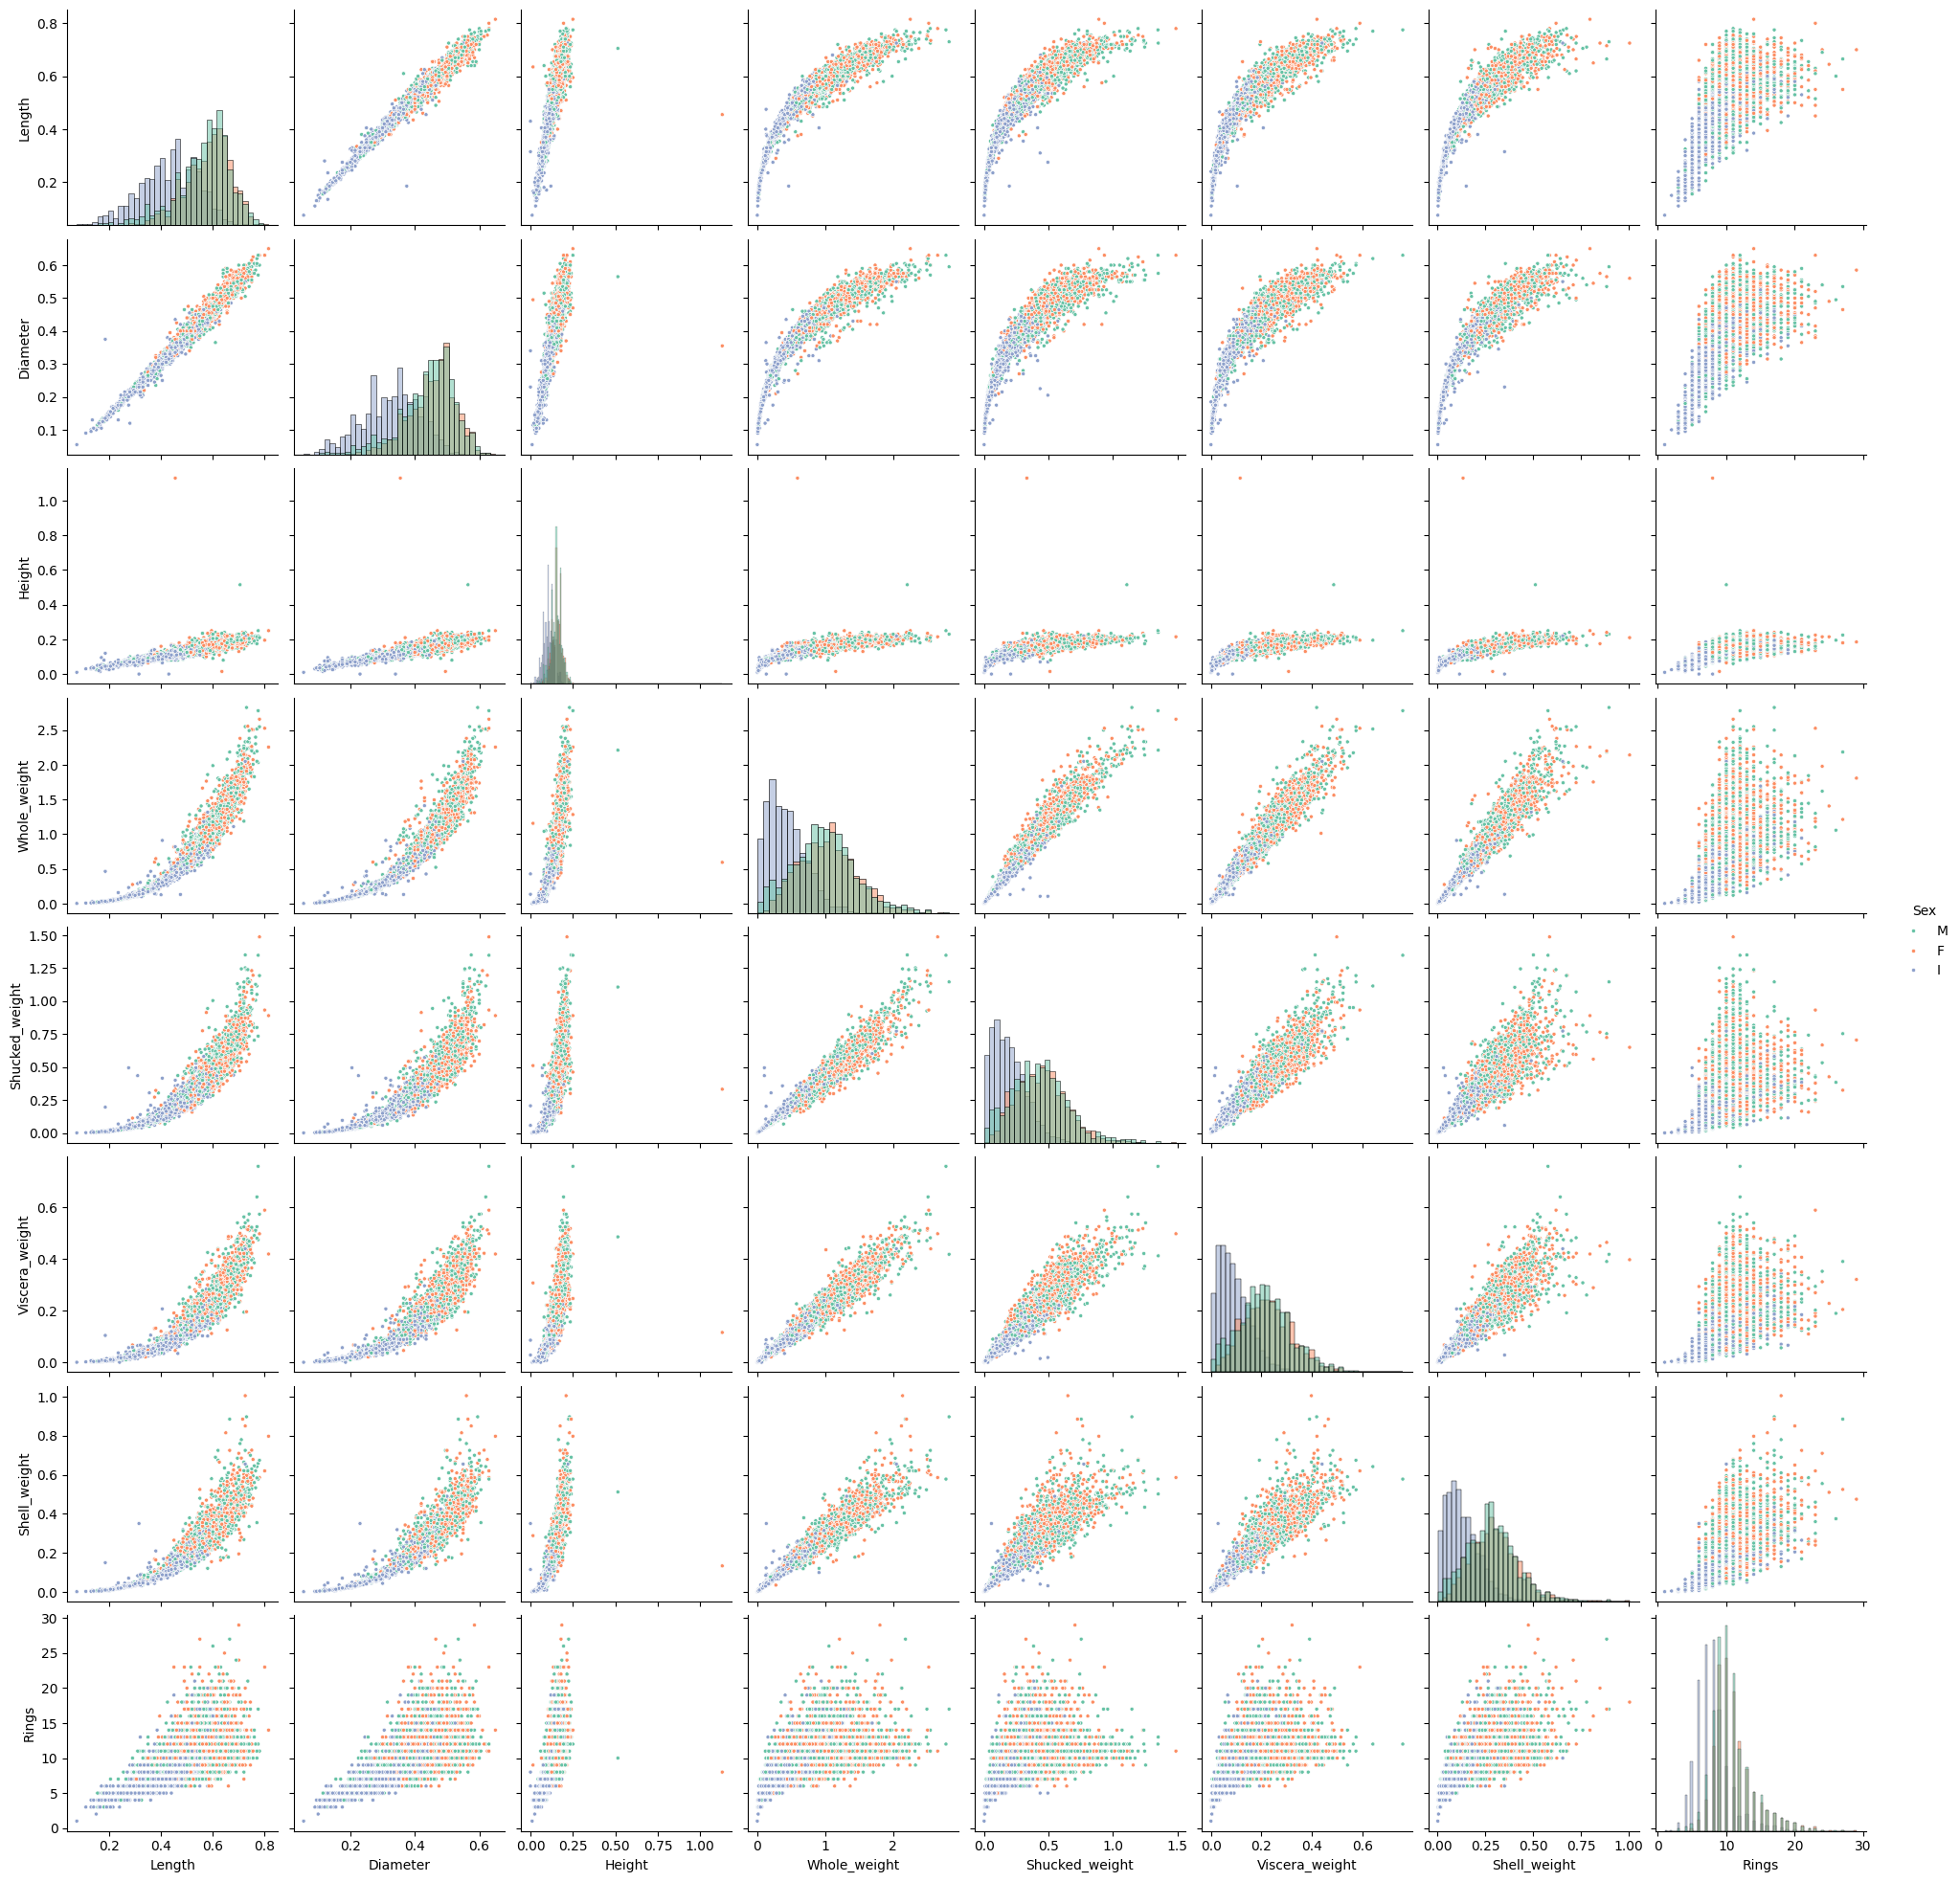

In [6]:
sns.pairplot(df, hue="Sex", markers = '.', diag_kind='hist', palette="Set2")
plt.show()

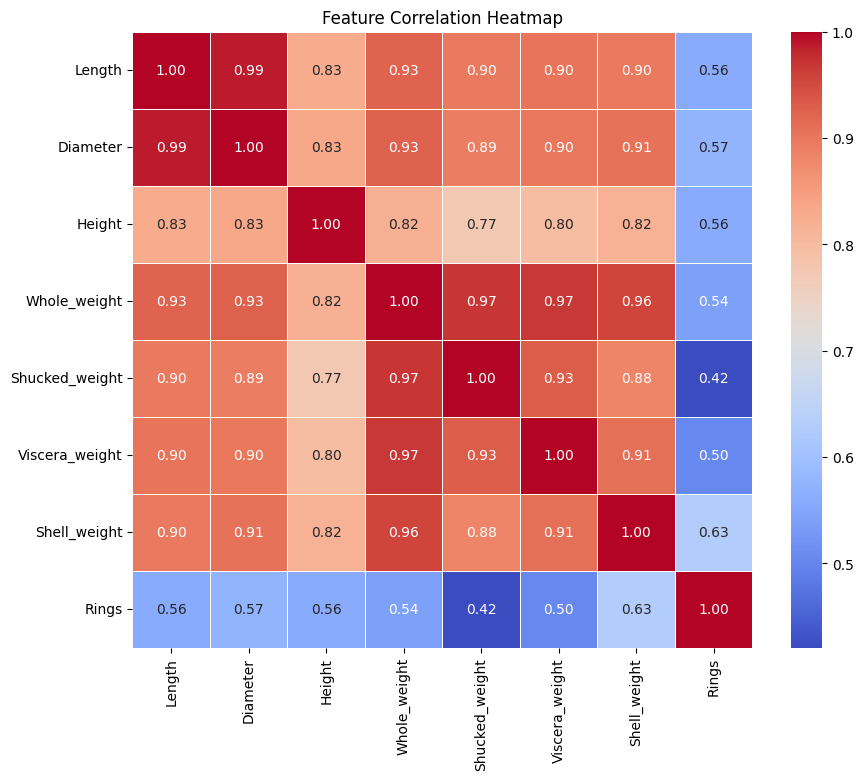

In [8]:
# Code for Visualization-2
# Compute correlation matrix (excluding categorical column 'Sex')
corr_matrix = df.drop(columns=['Sex']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

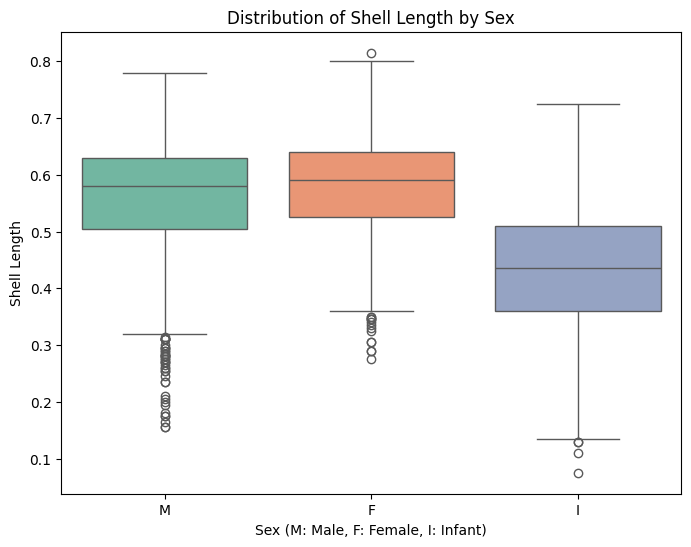

In [11]:
# Code for Visualization-3
plt.figure(figsize=(8, 6))
sns.boxplot(x="Sex", y="Length", data=df, hue="Sex", palette="Set2")
plt.title("Distribution of Shell Length by Sex")
plt.xlabel("Sex (M: Male, F: Female, I: Infant)")
plt.ylabel("Shell Length")
plt.show()

Write your observations from the plots and how can the same be used for machine learning purposes.

**Answer for Visualization-1:** the pairplot provides the diagonal plots showing the histograms of individual numerical features, showing their distributions. it shows that all the numerique features display some kind of skewness.

**Answer for Visualization-2:** the heatmap of correlation identifies relationships between numerical features. thus we can observe strong correlation between several features: (Diameter, Length, 99%), (whole_weight, Length, 93%)...

**Answer for Visualization-3:** The boxplot compares shell length distribution among Male (M), Female (F), and Infant (I)  it provides understanding if the size differs between gender.

### Taking a closer look at data distributions 

Let's take a closer look at the data distributions. Here we'll group our features together into groups with common qualities. The first group will be shell weights consisting of 'Whole weight', 'Shucked weight', 'Viscera weight', and 'Shell weight'. The second group will be shell dimensions consisting of  'Length', 'Diameter', and 'Height'. The third group will simply be shell rings which corresponds to the 'Rings' column. For now, we'll ignore the 'Sex' column as it currently contains categorical variables.

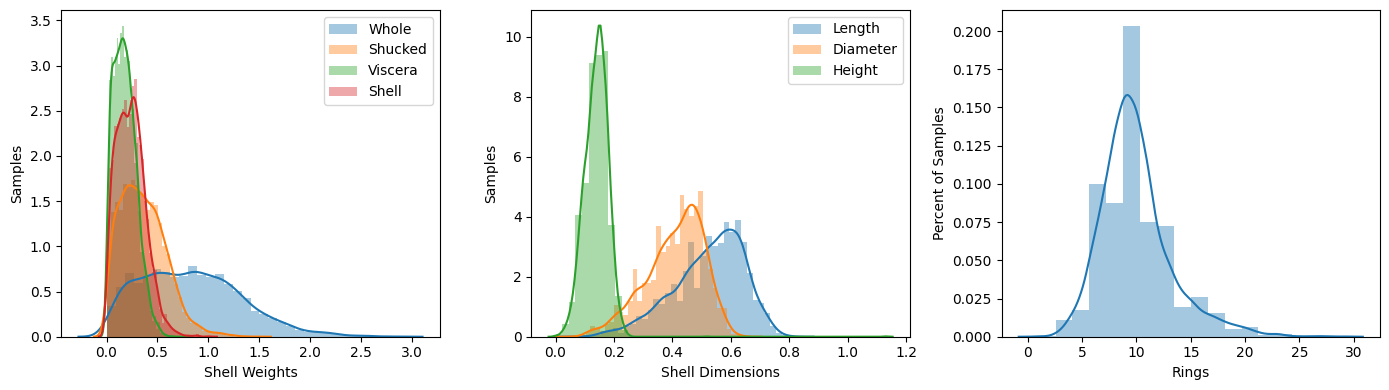

In [17]:
# codes from https://charlesreid1.github.io/circe/Abalone%20-%20Exploring%20the%20Data.html
import seaborn as sns
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# Plot weight information
sns.distplot(df['Whole_weight'],   label='Whole',   ax=ax1)
sns.distplot(df['Shucked_weight'], label='Shucked', ax=ax1)
sns.distplot(df['Viscera_weight'], label='Viscera', ax=ax1)
sns.distplot(df['Shell_weight'],   label='Shell',   ax=ax1)
ax1.legend()
ax1.set(xlabel='Shell Weights', ylabel='Samples')

# Plot dimension information
sns.distplot(df['Length'],   label='Length', ax=ax2)
sns.distplot(df['Diameter'], label='Diameter', ax=ax2)
sns.distplot(df['Height'],   label='Height', ax=ax2)
ax2.legend()
ax2.set(xlabel='Shell Dimensions', ylabel='Samples')

# Plot system response
sns.distplot(df['Rings'], bins=18, ax=ax3)
ax3.set(ylabel='Percent of Samples')
plt.tight_layout()

In the first two graphs we can see how each groups' feature distributions overlap. Recall, that for a data distribution the y-axis represents the number of samples or percent of samples and the x-axis represents the actual feature values.

Looking at the shell weights group plot we can see that most of the feature values are clustered between 0 and 1. However, it does seem that the 'Whole weight' feature has quite a broader distribution. 

The same idea applies to the feature grouping of shell dimensions. We can observe here that the 'Diameter' and 'Height' features do overlap some. Meanwhile, 'Height' seems to be concentrated around the value of .1.

Lastly lets take a look at the ring feature distribution graph to see if it will make a good target. Here we can see that shells with 5 rings only make up 2% of the data samples, while shells with 10 rings make up 20% of the data samples. Typically, we want all our targets to have the same number of data samples, or close to the same number, so our algorithm isn't biased towards a target that has more data samples. Let's take a closer look to see how biased our results might be if we use the ring feature as our target.

<div id="TODO3"></div>

### Taking a closer look at our rings feature

### TODO 3 (5 points)
Let's take a closer look at the rings feature. Follow the steps below to complete this TODO.

1. Print a sorted array of all the unique values in the feature 'Rings'.

2. Print the frequency of each sample in this column.

3. Print the samples with frequency greater than 100.

In [23]:
# TODO 3.1
unique_rings = sorted(df['Rings'].unique())
print(unique_rings)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29]


Now we print out 'Ring' column and the number of samples each value has by using the Pandas DataFrame `value_count()` method. Notice how `value_count()` has already sorted our data in descending order according to the number of samples per each unique ring value. 

In [30]:
# TODO 3.2
print(df['Rings'].value_counts())


Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64


Wow, above we can confirm that the ring data distribution is quite spread, as previously observed. In fact, our ring feature data distribution is so spread some ring counts only contain 1 data sample! This is good sign that if we use the ring feature as our target, then our model will be biased towards rings counts that have many samples. For instance, our algorithm will be more likely to predict ring counts of 9, 10, and 8 because it will have seen way more of their samples.

What if we only look at ring counts which have over 100 samples? Will truncating our ring targets lessen the bias? Let's see!

In [36]:
# TODO 3.3
rings_frequency = df['Rings'].value_counts()
frequent_rings = rings_frequency[rings_frequency > 100].sort_index()
print(frequent_rings)


Rings
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
Name: count, dtype: int64


Welp, this gives us 11 target classes now. Still the spread of data distribution is high and thus the bias is still their. Typically, in this scenario we have to compensate for our imbalanced by changing the data or adjusting our algorithm to account for the bias. If we wanted to account for data imbalance at the level of our data we could downsample or upsample our data. Likewise, if we want to account for bias at the level of the algorithm we could apply some form of algorithmic weighting to emphasis minority classes. We'll just quickly elaborate on downsampling and upsampling as it is the most straightforward.

Downsampling means we randomly sample, samples from each target. The amount in which we sample corresponds to the target with the least amount of samples. For instance, our target with the least amount of samples is the ring count of 15 here. This means we would downsample the rest of targets to only have 103 samples.

Upsampling applies the same idea but in the reverse direction. Once again we randomly sample, samples from each target. The amount in which we sample now corresponds to the target with the most samples. Here our target with the most samples is the ring count of 9. This means we upsample the rest of our targets to have 689 samples. In practice, we duplicate the samples or augment existing samples of targets that have lower sample counts until they reach the desired sample count.

Both of these data compensation methods have their pros and cons. However, accounting for a imbalanced and bias data is out of scope for this lab. Let's instead choose a much easier classification feature like 'Sex'! If you have any questions about dealing with imbalanced and biased datasets feel free to ask!

<div id="TODO4"></div>

### TODO 4 (5 points)

Complete the `data_splitting()` function by splitting the passed data `data` and targets `target` using Sklearn. Store the values into `X_train`, `X_test`, `t_train`, and `t_test`. Be sure to pass the arguments that correspond to the following descriptions:
    1. Split the data/targets using a 80/20 split (80% for training and 20% for testing).

Partition the abalone dataset using data_splitting function with 'Sex' as the target column.

In [39]:
from sklearn.model_selection import train_test_split

def data_splitting(data, target):  
    # TODO 4
    X_train, X_test, t_train, t_test = train_test_split(data, target,test_size=0.2, random_state=0 )
    return X_train, X_test, t_train, t_test
    
X_train, X_test, t_train, t_test = data_splitting(
    data=df.iloc[:, 1:], 
    target=df['Sex']
)

print("Train data shape: {}".format(X_train.shape))
print("Train target shape: {}".format(t_train.shape))
print("Test data shape: {}".format(X_test.shape))
print("Test target shape: {}".format(t_test.shape))

Train data shape: (3341, 8)
Train target shape: (3341,)
Test data shape: (836, 8)
Test target shape: (836,)


In [40]:
todo_check([
    ("X_train.shape == (3341, 8)", "X_train has the wrong shape"),
    ("X_test.shape == (836, 8)", "X_test has the wrong shape"),
    ("t_train.shape == (3341,)", "t_train has the wrong shape"),
    ("t_test.shape == (836,)", "t_test has the wrong shape"),
])

Your code PASSED the code check!


# Decision Tree Classification

<div id="TODO5"></div>

### TODO 5 (5 points)

General note: You can create additional `evaluation_report()` functions to measure other performance measures using some classification metric functions in [sklern.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).


1. Create an instance of Sklearn's `DecisionTreeClassifier` class. Store the output into `clf`. Pass the arguments that correspond to the following descriptions:
    1. Use a seed of 0 for the `random_state` argument. **WARNING: If you don't use this seed, you are likely to fail future TODOs even if your code is correct!**
    
    
2. Train the classifier instance.


3. Complete the `evaluation_report()` function by evaluating the *training accuracy* of the model. Store the output into `train_score`.


4. Complete the `evaluation_report()` function by evaluating the *testing accuracy* of the model. Store the output into `test_score`.


5. Properly call the `evaluation_report()` function to return the train/test accuracy scores. Store the output into `train_score` and `test_score` and print them.


In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# TODO 5.1 - 5.2
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, t_train)


DecisionTreeClassifier(random_state=0)

In [45]:
def evaluation_report(model, data):
    """
       evaluation report
           create a classification evaluation using accuracy

           parameters
           -----------
           model      trained classifier instance
           data       tuple of (X_train, X_test, t_train, t_test)
    """
   
    X_train, X_test, t_train, t_test = data
    
    # TODO 5.3 - 5.4
        # Predict on training data
    t_train_pred = model.predict(X_train)
        # Calculate training accuracy
    train_score = accuracy_score(t_train, t_train_pred)
    
        # Predict on testing data
    t_test_pred = model.predict(X_test)
        # Calculate testing accuracy
    test_score = accuracy_score(t_test, t_test_pred)
    return train_score, test_score

# TODO 5.5
# Prepare data tuple
data = (X_train, X_test, t_train, t_test)
# Evaluate the model - call evaluation_report
train_score, test_score = evaluation_report(clf, data)

print(f"Train Accuracy: {train_score}\nTest Accuracy: {test_score}\n")

Train Accuracy: 1.0
Test Accuracy: 0.5059808612440191



In [46]:
todo_check([
    ("train_score > .95", "train_score needs to be greater than .95"),
    ("test_score >= .4", "test_score needs to be greater than .4"),
])

Your code PASSED the code check!


<div id="TODO6"></div>

### TODO 6 (5 points)

Now, let us plot the results and see how much of test misses we have. 

1. Compute the predictions for test data `X_test`.

2. Sort the `t_test` with the NumPys `argsort()` function. Store the output into `sorted_idx`.

3. Plot the targets *with* the predictions such that both are indexed at `sorted_idx`. Additionally, the targets markers should be big red dots ('o') and the prediction markers should be blue dots ('.').

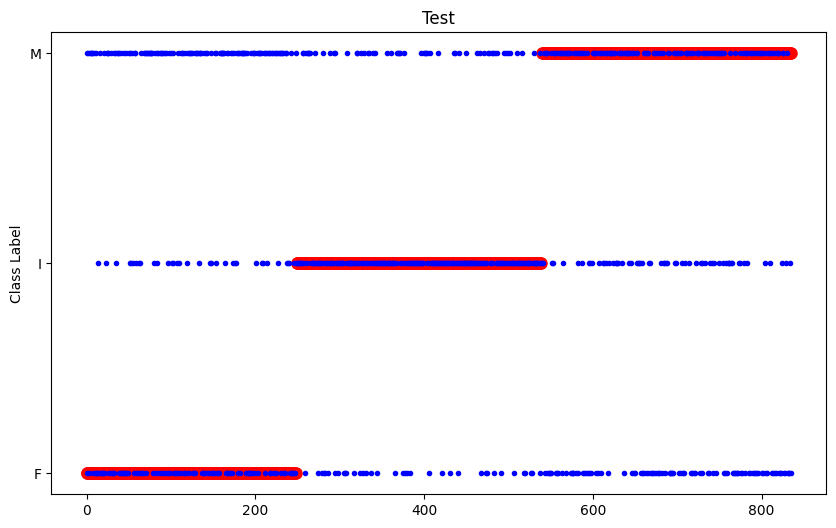

In [51]:
# TODO 6.1

t_test_pred = clf.predict(X_test)


# TODO 6.2
sorted_idx = np.argsort(t_test)


# TODO 6.3
plt.figure(figsize=(10, 6))
plt.plot(range(len(t_test)), t_test.iloc[sorted_idx], "ro", markersize=8,label='True Labels')
plt.plot(range(len(t_test_pred)), t_test_pred[sorted_idx], "b.", markersize=6, label='Predictions')        
#plt.xlabel('Sample Index (sorted by true labels)')
plt.ylabel('Class Label')
plt.title('Test')
#plt.legend()
plt.show()



## Analyzing Trees

When the tree is small, eye observation is possible for us better understanding of the model/data. 
Let us plot the tree and see what we can learn from it. 

<div id="TODO7"></div>

### TODO 7.1 (3 points)

1. Create a tree plot using Sklearn's `plot_tree()` function.

    1. Hint: You will likely need to adjust the figure size.

    1. Hint: Try using the `filled` argument to color code the nodes to indicate the majority class.
    
    1. Hint: Double-click the plot to zoom in slightly more.
    
<font color="red"><b>WARNING: THIS CODE CAN TAKE A LONG TIME TO RUN! </b></font>   


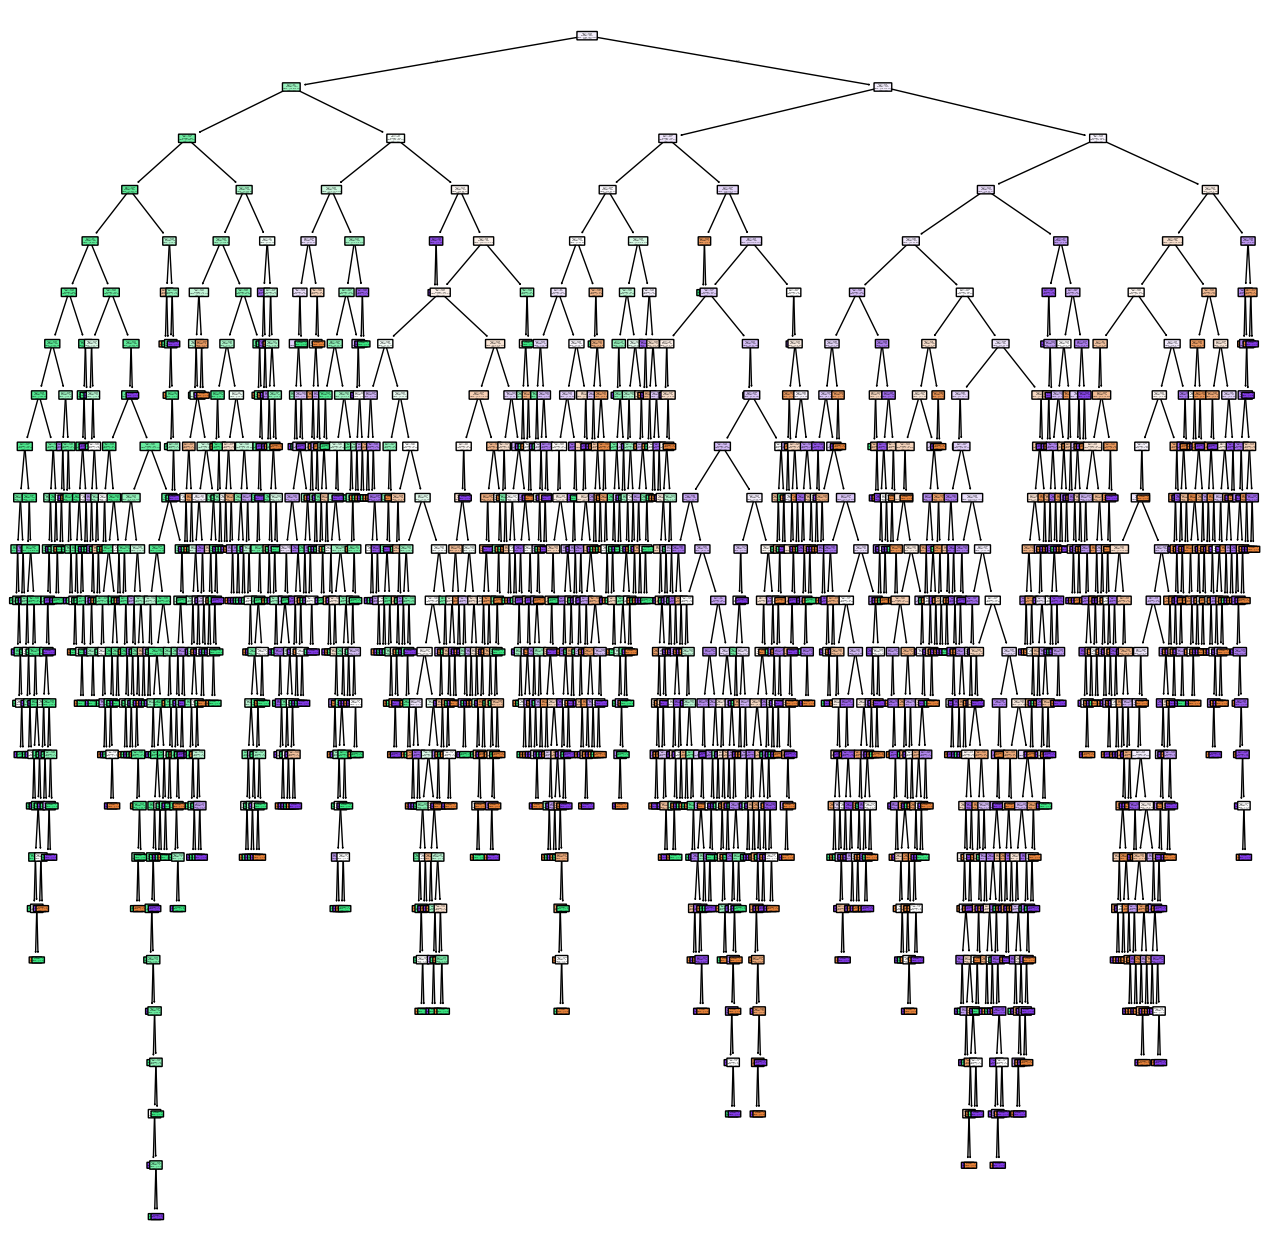

In [52]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16,16))

# TODO 7.1
plot_tree(clf, filled=True, rounded=True, class_names=True)
plt.show()


Whew~! The tree is huge! Is there any one who can read this? 
Can you plot this a bit readable by limiting the depth? 

### TODO 7.2 (5 points)

1. Replot the tree plot but now with a max depth of 3.
    1. Hint: You might need to adjust figure size.


2. From the tree, what were you able to observe? What is it telling you, if anything, about the performance of the classifier?

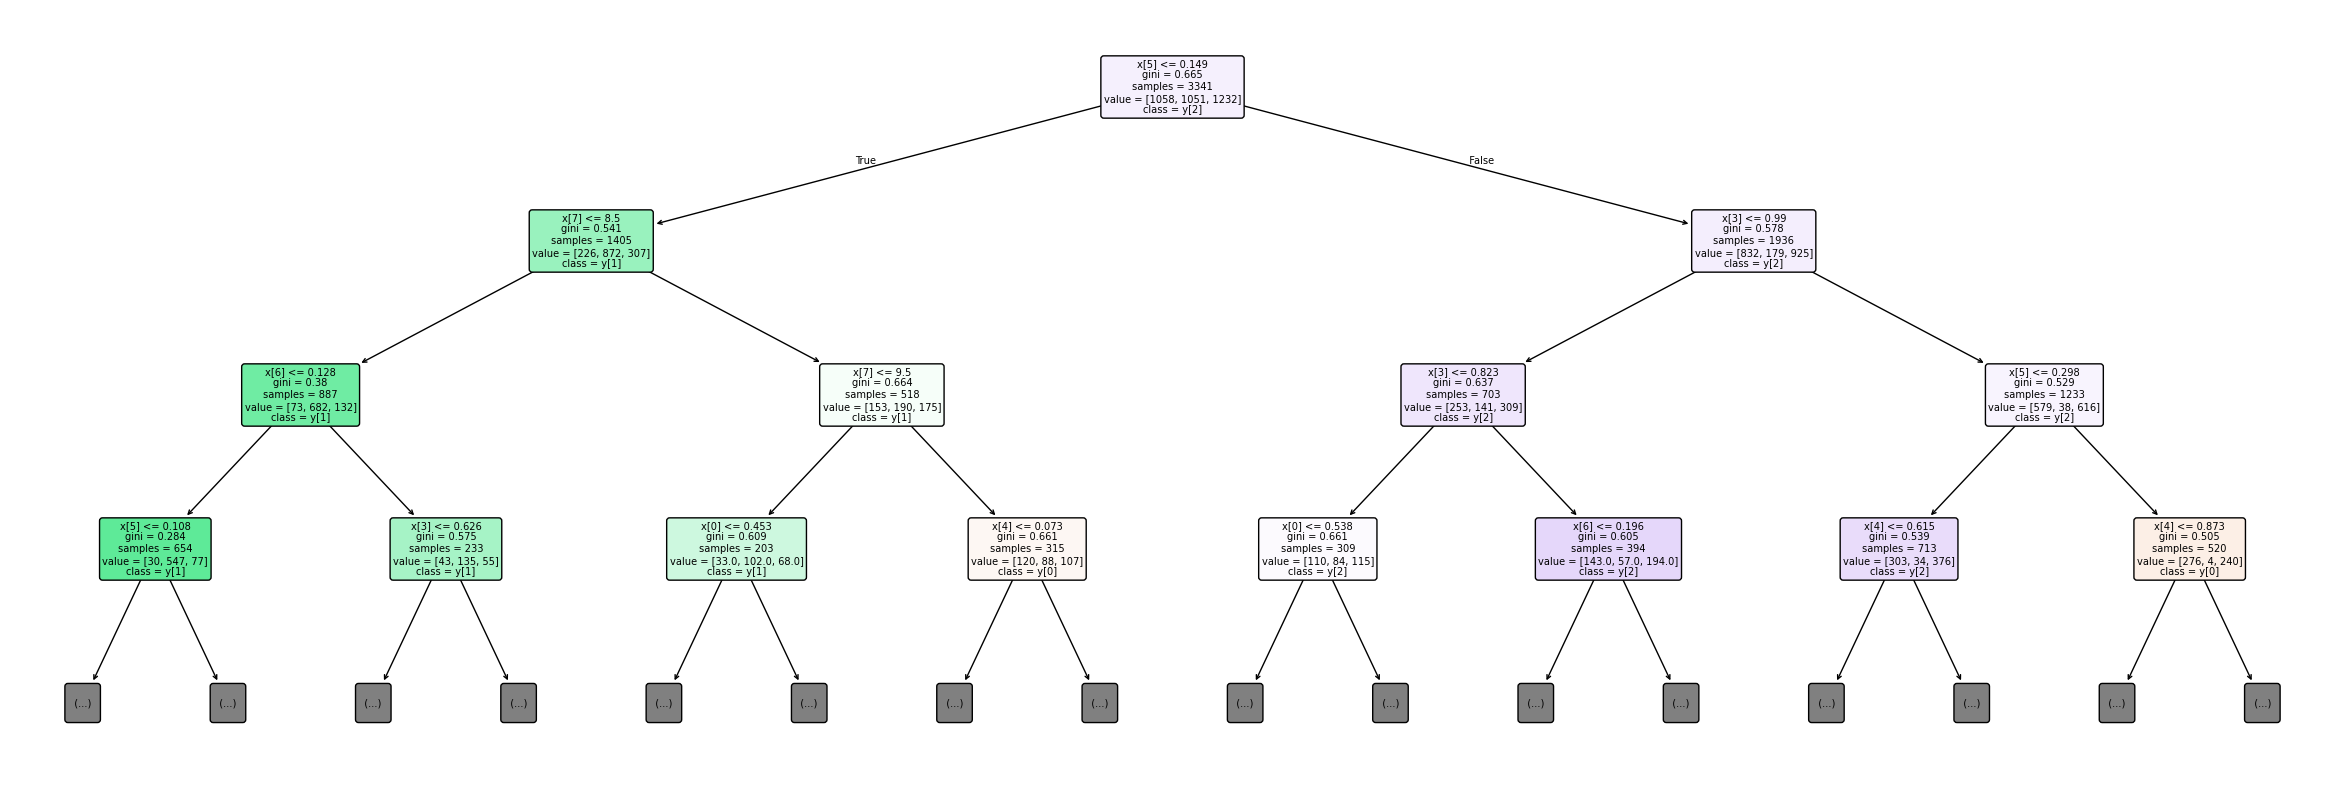

In [53]:
plt.figure(figsize=(30,10))

# TODO 7.2-1
plot_tree(clf, filled=True, rounded=True, max_depth = 3, class_names=True)
plt.show()


`TODO 7.2-2` From the tree, what were you able to observe? Is it telling you anything about the performance? Can you read it from the tree? 

`ANSWER` from the tree, first of all, the performance was very fast, we can see some values in the nodes: the gini impurity that is decreasing as we move towards the leaves, the number of samples, the values (how many training instances for each class), and the class. 

### Pruning the Tree

Now, let us try pruning the tree to improve the training speed and model performance.

#### TODO 7.3 (7 points)

1. Create another decision tree instance. Store the output into `pruned_tree`. Pass arguments based on the following descriptions.
    1. Define the max depth as 4.
    2. Use a seed of 0 for the `random_state` argument. **WARNING: If you don't use this seed, you are likely to fail future TODOs even if your code is correct!**

2. Train the pruned tree instance.

3. Call the `evaluation_report()` function to measure the performance.

4. Plot the `pruned_tree` using the `plot_tree()` function.
    1. Hint: Be sure to specify the `filled` argument for color coding.

5.  State your general observations of the new pruned tree. Is it better than before?

Train Accuracy: 0.579167913798264
Test Accuracy: 0.5490430622009569



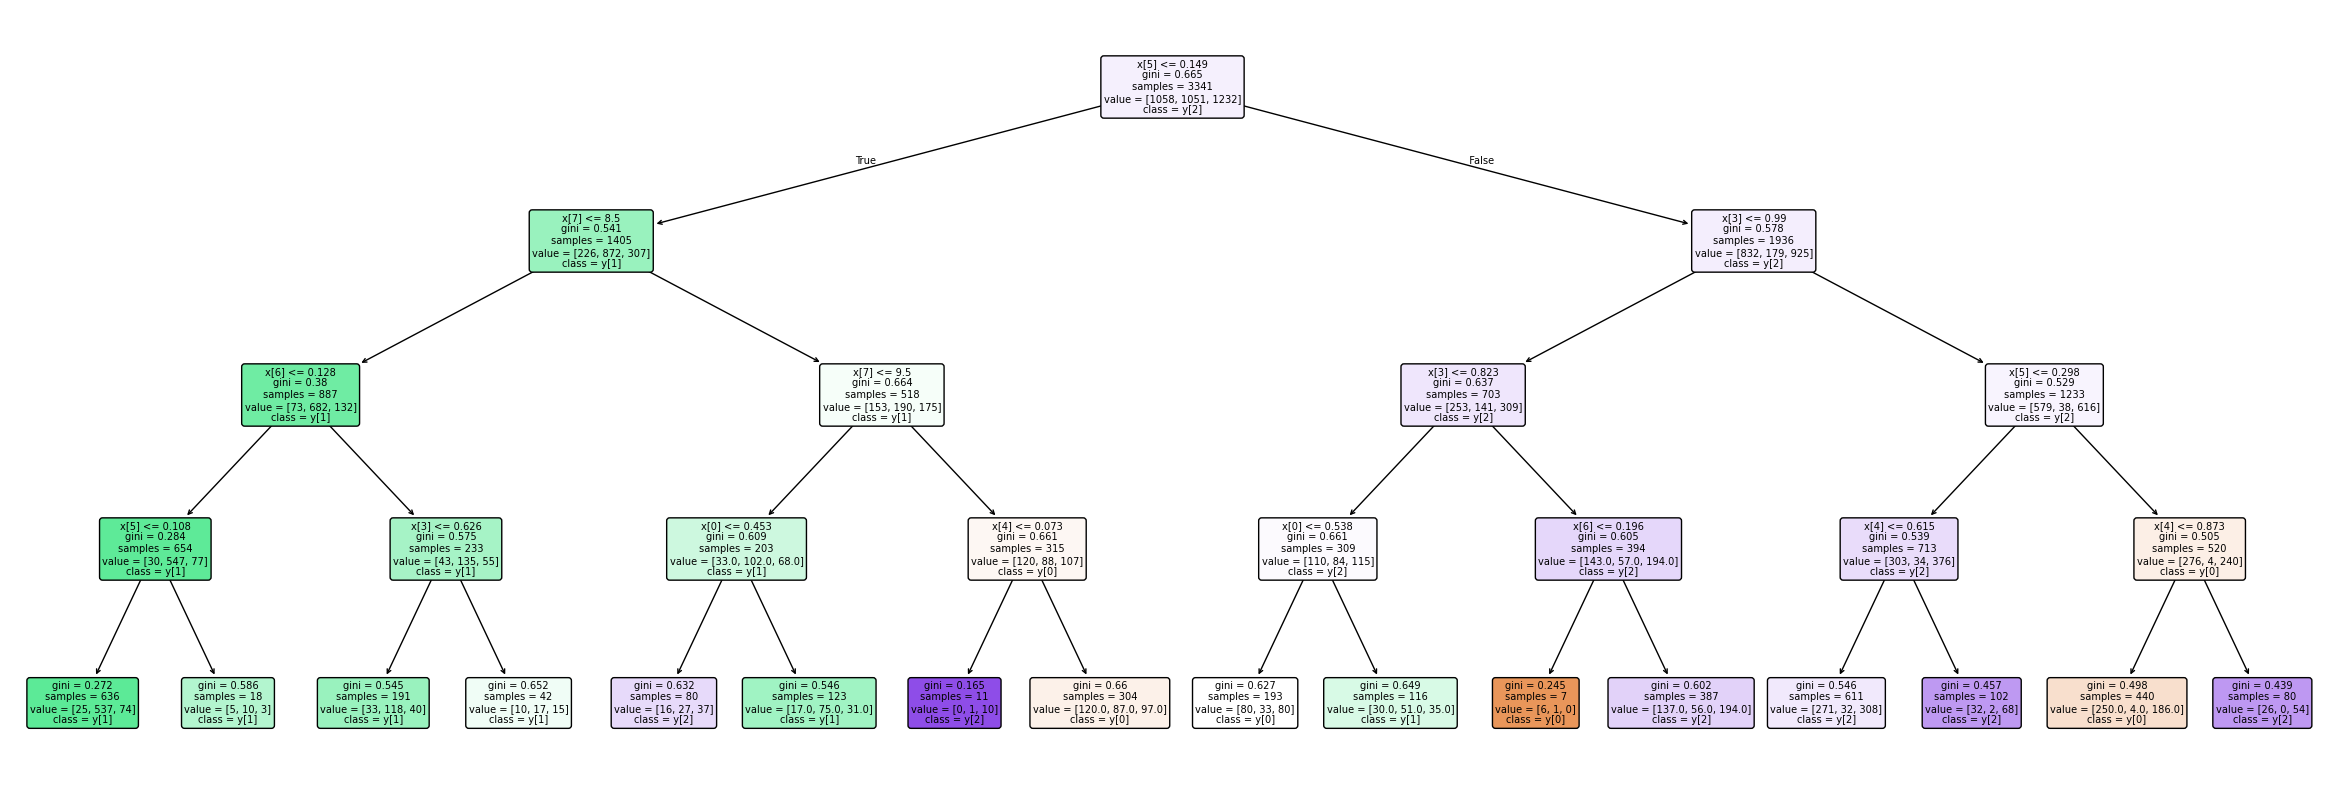

In [54]:
# TODO 7.3 (1-3)
pruned_tree = DecisionTreeClassifier(max_depth=4, random_state=0)
pruned_tree.fit(X_train, t_train)

# Prepare data tuple
data = (X_train, X_test, t_train, t_test)
train_score, test_score = evaluation_report(pruned_tree, data)

print(f"Train Accuracy: {train_score}\nTest Accuracy: {test_score}\n")

plt.figure(figsize=(30,10))

# TODO 7.3-4
plot_tree(pruned_tree, filled=True, rounded=True, class_names=True)
plt.show()


`TODO 7-3.5`  State your general observations of the new pruned tree. Is it better than before?

**DO NOT WRITE YOUR ANSWER IN THIS CELL!**

`ANSWER: The observation is that the leaves on the pruned tree have data, while the previous tree did not. The pruned tree looks better.

In [55]:
garbage_collect(['clf', 'pruned_tree', 'train_score', 'test_score', 'sorted_idx', 'y_test'])


# Random Forest

Now, it is time to use multiple trees. Using the random forest, let us examine if we can improve the performance. 
Before moving forward, we need to decide how many trees to form a forest. 



<div id="TODO8"></div>


### TODO 8-1 (10 points)

Referring the lecture slides, plot the train, test, and out-of-bag performance against the number of estimators. 

General Hints: 
- You can copy and paste the codes from the lecture slides to start this TODO.
- You might see warnings when running the loop, this is okay!

**Before the loop, complete the following.**

1. Create an instance using the proper Sklearn class for conducting random forest classification (make sure to import and use the right class if needed). Store the output into `rf`. Pass the arguments that correspond to the following descriptions:
    1. warm starting should be enabled
    2. Out-of-bag sampling should be enabled.
    3. Use a seed of 0 for the `random_state` argument. **WARNING: If you don't use this seed, you are likely to fail future TODOs even if your code is correct!**
   

**Within the below loop, complete the following.**

2. Set the number of estimators `n_est` using the `set_params()` method and then train the `rf` classifier.


3. Compute the train and test scores. Store the output into `train_score` and `test_score`.
    1. Hint: Feel free to use `evaluation_report()`.


**After the loop, complete the following.**

4. In a single plot, plot the 3 accuracies contained within `accuracies`. 
    1. Hint: You should see 3 accuracy curves. Here the accuracies represent different accuracies across a different number of classifiers.


5. How many estimators do you think are best? Explain why.  

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#==================================================
# TODO 8-1.1
rf = RandomForestClassifier(warm_start=True, oob_score=True, random_state=0)
# Range of `n_estimators` values to explore.
min_estimators = 5
max_estimators = 250
rng = range(min_estimators, max_estimators, 5)

accuracies = {'train': [], 'test': [], 'oob': []}
#(X_train, X_test, t_train, t_test)
for n_est in rng:
    #==================================================
    # TODO 8-1.2
    rf.set_params(n_estimators=n_est)
    rf.fit(X_train, t_train)

    #==================================================
    # TODO 8-1.3
   # Prepare data tuple
    data = (X_train, X_test, t_train, t_test)
    train_score, test_score = evaluation_report(rf, data)

    
    # Track errors for different number of estimators
    accuracies['train'].append(train_score)
    accuracies['test'].append(test_score)
    accuracies['oob'].append(rf.oob_score_)

In [59]:
todo_check([
    ("accuracies['train'][-1] > .90", "accuracies['train'] should be greater than .90."),
    ("accuracies['test'][-1] > .52", "accuracies['test'] should be greater than .52."),
    ("accuracies['oob'][-1] > .52", "accuracies['oob'] should be greater than .52."),
])

Your code PASSED the code check!


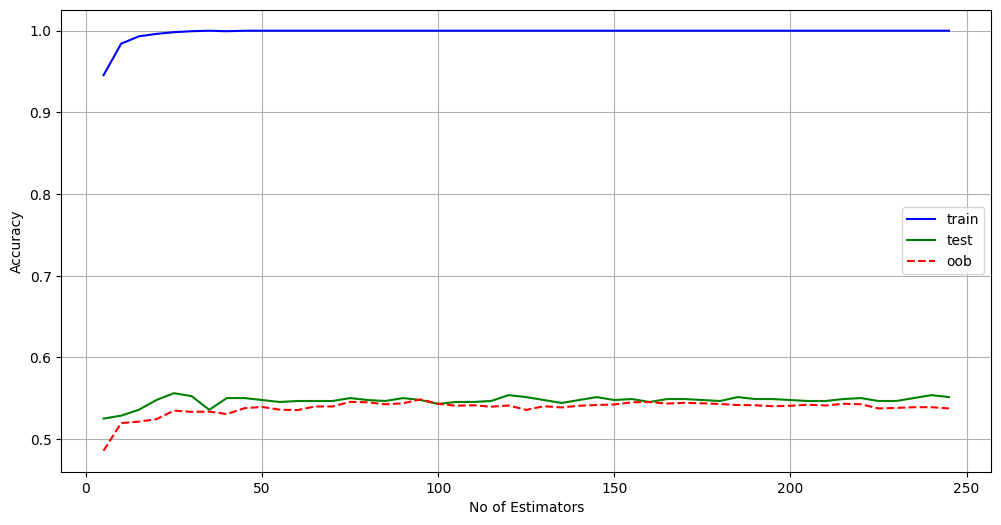

In [63]:
# TODO 8-1.4

plt.figure(figsize=(12, 6))
plt.plot(rng, accuracies['train'], label='train', color='blue')
plt.plot(rng, accuracies['test'], label='test', color='green')
plt.plot(rng, accuracies['oob'], label='oob', color='red', linestyle='--')
plt.xlabel('No of Estimators')
plt.ylabel('Accuracy')
#plt.title('Random Forest Performance vs. Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

`TODO 8-1.5` How many estimators do you think best? Explain why.

`ANSWER:` The test score is almost flat, meaning the number of estimators had very little impact on the model's performance. the accuracy rose till about 25 estmators then dropped then flattened.

### TODO 8.2 (3 points)

1. Using the best number of estimators, create AND train a new instance of the random forest classification Sklearn class. Store the output into `rf`. Pass the arguments that correspond to the following descriptions:
    1. Specify the number of estimators using what YOU think is the best number of estimators.
    2. Use a seed of 0 for the `random_state` argument. **WARNING: If you don't use this seed, your accuracy is likely to change when this cell is reran!**

2. Compute the train and test scores. Store the output into `train_score` and `test_score`.

In [76]:
# TODO 8.2
rf = RandomForestClassifier(n_estimators=25, random_state=0)
rf.fit(X_train, t_train)
data = (X_train, X_test, t_train, t_test)
train_score, test_score = evaluation_report(rf, data)


print(f"Train Accuracy: {train_score}\nTest Accuracy: {test_score}\n")

Train Accuracy: 0.9982041304998504
Test Accuracy: 0.55622009569378



In [68]:
todo_check([
    ("test_score > .52", "test_score needs to be greater than .52"),
])

Your code PASSED the code check!


In [69]:
garbage_collect(['rf', 'train_score', 'test_score'])

## Extremely Randomized Trees

Well, it seems very hard to achieve further improvement. Would additional randomization help to better generalize the model? 
Let us try extremely randomized trees. 

<div id="TODO9"></div>

### TODO 9 (5 points)
1. Using the best number of estimators, to create AND train an instance Sklearn's `ExtraTreesClassifier` class. Store the output into `erf`. Pass the arguments that correspond to the following descriptions:
    1. Specify the number of estimators using what YOU think is the best number of estimators.
    2. Use a seed of 0 for the `random_state` argument. **WARNING: If you don't use this seed, your accuracy is likely to change when this cell is reran!**

2. Compute the train and test scores. Store the output into `train_score` and `test_score`.

In [77]:
from sklearn.ensemble import ExtraTreesClassifier

# TODO 9
erf = ExtraTreesClassifier(n_estimators=50, random_state=0)
erf.fit(X_train, t_train)
data = (X_train, X_test, t_train, t_test)
train_score, test_score = evaluation_report(erf, data)

print(f"Train Accuracy: {train_score}\nTest Accuracy: {test_score}\n")

Train Accuracy: 1.0
Test Accuracy: 0.5418660287081339



In [78]:
todo_check([
    ("test_score > .52", "test_score needs to be greater than .52"),
])

Your code PASSED the code check!


In [79]:
garbage_collect(['erf', 'train_score', 'test_score'])

<div id="TODO10"></div>


### TODO 10 (5 points)

Let us try a naive feature selection method first.

1. Repartition the `df` by calling the `data_splitting()` function where the 'Sex' column will be our target. Store the output into `X_train`, `X_test`, `t_train`, and `t_test`.
    1. Hint: Repeat what you did in `TODO 4`.


2. Initialize an instance of the `VarianceThreshold` class, select features whose variance is higher than 0.1. Store the output into `vt`.


3. Use the `fit_transform()` method to train and transform the data `X_train`. Store the output into `vt_X_train`.


4. Store the names of selected features into `selected_features`.

    **Hint:** Refer to the previous week's lab to complete this TODO.
 

# Feature Selection

We have been using all the eight features to make a prediction. Well, is there any feature not necessary? Or is there any one actually disturbing the classification? It is reasonable to play with feature selection to selectively find a good set of features. 

In [88]:
# TODO 10
X_train, X_test, t_train, t_test = data_splitting(
    data=df.iloc[:, 1:], 
    target=df['Sex']
)
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=0.1)

vt_X_train = vt.fit_transform(X_train)

selected_mask = vt.get_support()
selected_features = X_train.columns[selected_mask]


pd.DataFrame(vt_X_train, columns=selected_features)

,Whole_weight,Rings
0,0.0330,5.0
1,0.0410,3.0
2,1.3905,15.0
3,1.8900,10.0
4,1.0410,14.0
...,...,...
3336,1.6220,10.0
3337,1.1705,12.0
3338,0.9590,10.0
3339,1.1270,9.0


In [89]:
todo_check([
    ("X_train.shape == (3341, 8)", "X_train has the wrong shape"),
    ("X_test.shape == (836, 8)", "X_test has the wrong shape"),
    ("t_train.shape == (3341,)", "t_train has the wrong shape"),
    ("t_test.shape == (836,)", "t_test has the wrong shape"),
    ("vt_X_train.shape == (3341, 2)", "vt_X_train has the wrong shape"),
    ("vt.get_params()['threshold'] == .1", "Threshold was not set to 0.1.")
])

Your code PASSED the code check!


In [82]:
garbage_collect(['vt', 'vt_X_train', 'selected_features', 'X_train', 'X_test', 't_train', 't_test', 'train_score' 'test_score'])

<div id="TODO11"></div>

### TODO 11 (5 marks)

Now, lets try to use only these features to estimate our model's performance.

1. Create a new dataframe using features given above and the target feature `Sex`. Store this dataframe in the variable `df_selected`.
2. Split the dataframe `df_selected` into training and testing data using  `data_splitting` function. Store the output into `X_train`, `X_test`, `t_train`, and `t_test`.
    1. Hint: Repeat what you did in `TODO 4`.
3. Create an instance of Sklearn's `DecisionTreeClassifier` class. Store the output into `decision_sel`. Train the classifier instance.
4. Properly call the `evaluation_report()` function to return the train/test accuracy scores. Store the output into `train_score` and `test_score` and print them.

    **Hint:** Feel free to use the code that you have used to complete the previous TODOs.

In [92]:
# TODO 11.1
df_selected = pd.concat([df[selected_features], df["Sex"]], axis = 1)

df_selected

,Whole_weight,Rings,Sex
0,0.5140,15,M
1,0.2255,7,M
2,0.6770,9,F
3,0.5160,10,M
4,0.2050,7,I
...,...,...,...
4172,0.8870,11,F
4173,0.9660,10,M
4174,1.1760,9,M
4175,1.0945,10,F


In [99]:
# TODO 11.2-11.4
X_train, X_test, t_train, t_test = data_splitting(
    data=df_selected.iloc[:, :-1], 
    target=df['Sex']
)
decision_sel = DecisionTreeClassifier(max_depth=4,random_state=0)
decision_sel.fit(X_train, t_train)

data = (X_train, X_test, t_train, t_test)
train_score, test_score = evaluation_report(decision_sel, data)

print(f"Train Accuracy: {train_score}\nTest Accuracy: {test_score}\n")

Train Accuracy: 0.5600119724633343
Test Accuracy: 0.5466507177033493



In [101]:
todo_check([
    ("test_score > .5", "test_score needs to be greater than .5"),
])

Your code PASSED the code check!


### TODO 12 (15 points)

Explore some parameters in `DecisionTreeClassifier`and use `GridSearchCV` to find out the best values of each parameter that you can keep to get the best accuracy. Follow the below instructions:

1. Import `GridSearchCV`. 

2. Create a dictionary `hyper_parameters` to store the parameters and their values. Explore the list of parameters in the Sklearn documentation for DecisionTreeClassifier().

3. Create `GridSearchCV()` instance by passing the Decision Tree Classifier and hyper-parameters dictionary. Store the output into `gscv`.

4. Run the `gscv` instance by calling the `fit()` method and passing the data and the targets.

5. Access the best hyper-parameter combination that is stored inside the `gscv` instance after fitting. Store the output into `best_params`.

6. Train the decision tree classifier using these parameters and their corresponding values. Get the training and testing scores, store them in `train_score` and `test_score` respectively, and print them.

7. Compare this with the performance you've achieved when you used the `DecisionTreeClassifier` directly as done in TODO 5.

    **Hint**: Steps 1 to 5 are similar to what you have done in previous week's lab.

In [103]:
# TODO 12.1-12.5
from sklearn.model_selection import GridSearchCV
hyper_parameters = {
   'criterion': ['gini', 'entropy'],
   'splitter': ['best', 'random'],
   'max_depth': range(3,7),
   'min_samples_split': range(2,11),
   'min_samples_leaf': range(1,11)
}
dtclf = DecisionTreeClassifier(random_state=0)
gscv = GridSearchCV(estimator=dtclf, param_grid=hyper_parameters, cv=5, n_jobs=-1)
# Fit the model
gscv.fit(X_train, t_train)

best_params = gscv.best_params_


print(f"Best params: {best_params}")

Best params: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 2, 'splitter': 'random'}


In [104]:
# TODO 12.6
# Initialize the classifier with best parameters
optimized_dtc = DecisionTreeClassifier(**best_params)

# Train the classifier
optimized_dtc.fit(X_train, t_train)
data = (X_train, X_test, t_train, t_test)
train_score, test_score = evaluation_report(optimized_dtc, data)

print(f"Train Accuracy: {train_score}\nTest Accuracy: {test_score}\n")

Train Accuracy: 0.5513319365459444
Test Accuracy: 0.5394736842105263



`TODO 12.7:` Compare this with the performance you've achieved when you used the `DecisionTreeClassifier` directly as done in TODO 5.

`ANSWER:` When compared to the performance in TODO 5 I can see an improvement. The initial Test Accuracy was 0.5059808612440191 and now we have a Test Accuracy: of 0.5394736842105263.

<div id="feedback"></div>

# Feedback (2 point)

Did you enjoy the lab? 

Please take time to answer the following feedback qustions to help us further improve these labs! Your feedback is crucial to making these labs more useful!
    


* How do you rate the overall experience in this lab? (5 likert scale. i.e., 1 - poor ... 5 - amazing)  
Why do you think so? What was most/least useful?



`ANSWER:` I will rate this lab as amazing because of what I learned along the way, what I found the most useful is the idea of continual improvement of the performance.

* What did you find difficult about the lab? Were there any TODOs that were unclear? If so, what specfically did not make sense about it?

`ANSWER:` What I found a little difficult was what was a good set of the hyperparameters and what are valid range of their values is.

* Which concepts, if any, within the lab do you feel could use more explanation?

`ANSWER:` I think everything starts with a good understanding of the dataset. for classification, what should we look for in the dataset? I believe that is what visualization tries to find. but if I do not know what I need to look for then I do not know which plot will expose it.